In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir('./RQ2/')
repo='roslyn'

In [5]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = {}
metrics = ['defect_expertiseloss','expertiseloss','far','workload']
metric_legend={'defect_expertiseloss':'CSR','expertiseloss':'expertise','far':'FaR','workload':'CoreWorkload'}
def drawPlot(data,repo):
    plt.figure()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for metric in metrics:
        plt.plot(thresholds, data[metric], label=metric_legend[metric])
    plt.legend()
    plt.ylabel(f"Average percentage of change for {repo}")
    plt.xlabel("Value of P_D")
    ax.xaxis.grid(True) # Show the vertical gridlines

    image_format = 'svg' # e.g .png, .svg, etc.
    image_name = f'{repo}_change_avg.svg'

    plt.savefig(f'./{image_name}', format=image_format, dpi=1200)

graph = {}
def getResults(repo):
    for thr in thresholds: 
        results[thr] = {}
        for metric in metrics:
            temp = pd.read_csv(f'./{repo}/{thr}/{metric}.csv')
            results[thr][metric] = sum(temp[temp.columns[1]])/len(temp[temp.columns[1]])
    global graph
    graph = {}
    for metric in metrics:
        graph[metric] = [v[metric] for k, v in results.items()]
    drawPlot(graph,repo)

Roslyn
exp 21.855620207769707 16.442461818129647
far 2.5356338873948623 -28.94780345396476
workload 4.842086545383197 -0.4341462740622855
CaR 79.67983408978888 64.09054058716724
Rust
exp 7.453059844797821 7.2380288179679475
far -18.708920322599845 -21.143208905158012
workload 1.4792794174397217 1.0431412582313444
CaR 73.80231715406276 72.92768455529067
Kubernetes
exp 13.008798365931879 11.072643482241249
far -4.467737362155953 -28.045820756094578
workload -0.22239865951387972 -4.332780552841549
CaR 102.04145183532889 96.20100059312719


<Figure size 432x288 with 0 Axes>

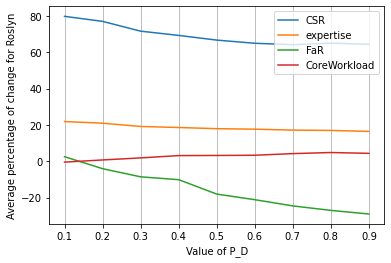

<Figure size 432x288 with 0 Axes>

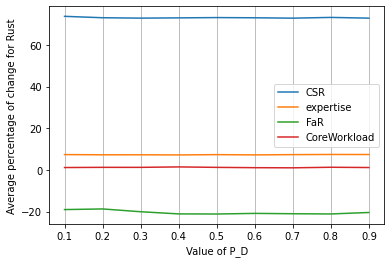

<Figure size 432x288 with 0 Axes>

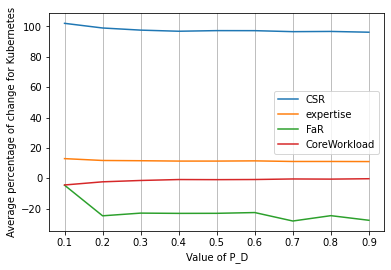

In [17]:
repos=['Roslyn','Rust','Kubernetes']
for repo in repos:
    print(repo)
    getResults(repo)
    print('exp',max(graph['expertiseloss']),min(graph['expertiseloss']))
    print('far',max(graph['far']),min(graph['far']))
    print('workload',max(graph['workload']),min(graph['workload']))
    print('CaR',max(graph['defect_expertiseloss']),min(graph['defect_expertiseloss']))

Roslyn
Rust
Kubernetes
exp 12.481043526566346
far -19.390106616857125
workload 0.932285018841502
CaR 79.99922661214707


<Figure size 432x288 with 0 Axes>

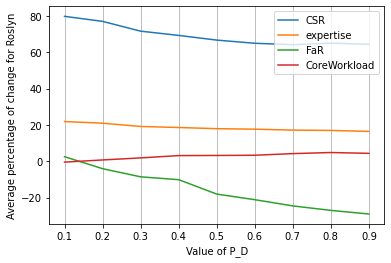

<Figure size 432x288 with 0 Axes>

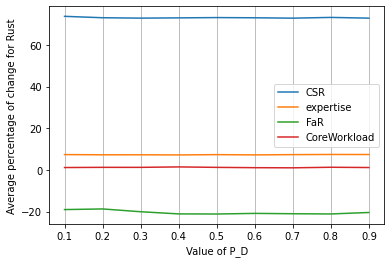

<Figure size 432x288 with 0 Axes>

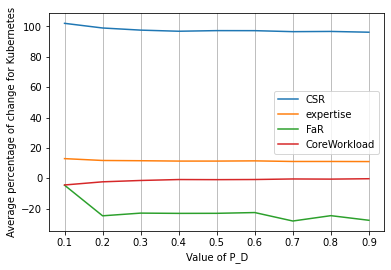

In [16]:
import statistics

metric_avg={'expertiseloss':0,'far':0,'workload':0,'CaR':0}
for repo in repos:
    print(repo)
    getResults(repo)
    metric_avg['expertiseloss'] += statistics.mean(graph['expertiseloss'])
    metric_avg['far'] += statistics.mean(graph['far'])
    metric_avg['workload'] += statistics.mean(graph['workload'])
    metric_avg['CaR'] += statistics.mean(graph['defect_expertiseloss'])
    
print('exp',metric_avg['expertiseloss']/len(repos))
print('far',metric_avg['far']/len(repos))
print('workload',metric_avg['workload']/len(repos))
print('CaR',metric_avg['CaR']/len(repos))
